# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

# Answer #1

## Libraries

We import the requisite libraries:

In [1]:
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import seaborn as sns

## 1) Web Scraping

We read the link containing the data with pandas ```pd.read_csv()``` function. 

In [2]:
link="https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv"
url=urlopen(link)
data=pd.read_csv(url)
data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


## 2) Data

Data includes top-grossing movies between 2007 and 2011.

When we examine our data, which contains various information about movies, with ```data.info()```, we see that there is no missing value.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


We also reach various features with ```data.describe().T```.

The .T for to get transpose our dataframe.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Audience score %,77.0,63.727273,13.657113,35.0,52.000000,64.000000,76.000000,89.000
Profitability,77.0,4.599483,8.031990,0.0,1.751351,2.642353,5.103117,66.934
Rotten Tomatoes %,77.0,46.701299,26.095001,3.0,26.000000,45.000000,64.000000,96.000
Year,77.0,2009.077922,1.354974,2007.0,2008.000000,2009.000000,2010.000000,2011.000


## 3) Data Processing

We count how many top grossing movies each studio made between 2007 and 2011 with ```Counter()```.

In [5]:
res=Counter(data['Lead Studio'])
res

Counter({'The Weinstein Company': 3,
         'Independent': 19,
         'Disney': 8,
         'Fox': 6,
         '20th Century Fox': 2,
         'Warner Bros.': 14,
         'Summit': 5,
         'Paramount': 4,
         'CBS': 1,
         'New Line': 1,
         'Sony': 4,
         'Universal': 8,
         'Lionsgate': 2})

## Data Visualition

And we use ```plt.barh()``` to visualize the information we find.

The reason for choosing horizontal graphics is that the texts do not get stuck.

Since the data we find with ```Counter()``` is in the dictionary structure, we consider the key parts and the values corresponding to the keys separately with ```res.values()``` and ``` list(res.keys())```.

```plt.rcParams['figure.figsize']``` is there to set the size of the chart.

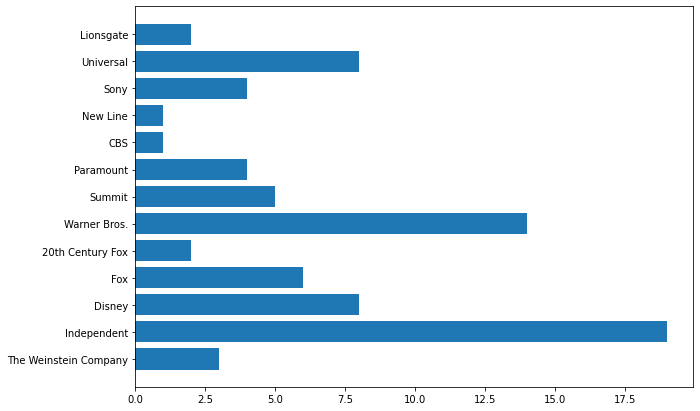

In [6]:
x=list(res.keys())
y=res.values()
plt.rcParams['figure.figsize'] = 10,7
plt.barh(x,y,height=0.8);

## 4)

This time we visualize our data with ```plt.pie()```.

For this, we calculate the percentage with numpy.

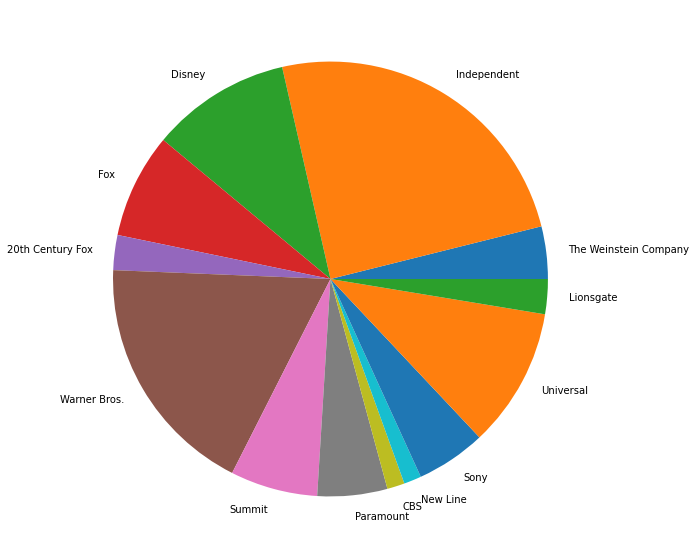

In [7]:
label=res.keys()
plt.rcParams['figure.figsize']=10,10
percent=100*np.array(list(res.values()))/sum(res.values())
plt.pie(percent,labels=label);

## 5) Cross-Tabulation

We make a cross-tabulation of Genres against the Year.

However, we cannot reach the desired result because genres are written incorrectly.

In [8]:
pd.crosstab(data['Genre'],data['Year'])

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comdy,0,1,0,0,0
Comedy,6,12,6,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,4,2,0,0,7
Romence,0,0,0,0,1
comedy,0,0,1,0,0


With the ```replace()``` function, we correct the typos and reach the information we want.

We create two different lists and replace the incorrect ones with the correct ones.

In [9]:
A=['Comdy','comedy','Romence','romance']
B=['Comedy','Comedy','Romance','Romance']
new_data=data.replace(A,B)
new_data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,Romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


In [10]:
hm=pd.crosstab(new_data['Genre'],new_data['Year'])
hm

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comedy,6,13,7,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,5,2,0,0,8


## 6)

We draw a 'heat-map' with ```sns.heatmap()``` (in seaborn library) of the corrected cross-tabulation above.

<AxesSubplot:xlabel='Year', ylabel='Genre'>

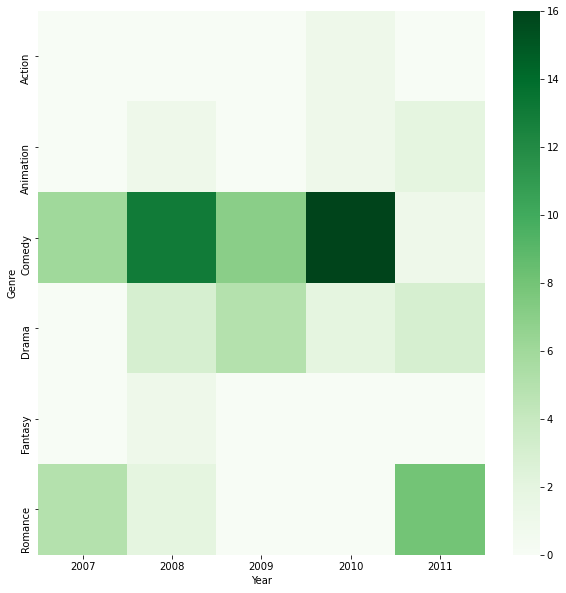

In [11]:
sns.heatmap(hm,cmap='Greens')

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

# Answer #2

## Libraries

We import the requisite libraries:

In [20]:
import pandas as pd
from urllib.request import urlopen
import networkx as nx

## 1) Web Scraping

We read the link containing the data with pandas ```pd.read_csv()``` function.

In [12]:
link='https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat'
url=urlopen(link)
data=pd.read_csv(url,names=['Airline','Airline ID','Source airport','Source airport ID','Destination airport','Destination airport ID','Codeshare','Stops','Equipment'])
data

,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


## 2) Data

Data includes airport codes where to fly from to go.

When we examine our data, which contains various information about flight, with ```data.info()```, we see lots of information about data.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Airline                 67663 non-null  object
 1   Airline ID              67663 non-null  object
 2   Source airport          67663 non-null  object
 3   Source airport ID       67663 non-null  object
 4   Destination airport     67663 non-null  object
 5   Destination airport ID  67663 non-null  object
 6   Codeshare               14597 non-null  object
 7   Stops                   67663 non-null  int64 
 8   Equipment               67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


## 3) Data Processing

We create the dataframe containing the source airport and destination airport from our big data with ```pd.assign()```.

In [14]:
df_2=pd.DataFrame().assign(Source_airport=data['Source airport'],Destination_airport=data['Destination airport'])
df_2

,Source_airport,Destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


In order to find out how many flights were made, we look at how many lines are the same. We use ```groupby()```.

We change the name of the column named size to flight.

In [16]:
S_D=['Source_airport', 'Destination_airport']
df_3=df_2.groupby(S_D,as_index=False).size()
df_3=df_3.rename(columns = {'size':'Flight'})
df_3

,Source_airport,Destination_airport,Flight
0,AAE,ALG,1
1,AAE,CDG,1
2,AAE,IST,1
3,AAE,LYS,1
4,AAE,MRS,2
...,...,...,...
37590,ZYI,SZX,1
37591,ZYI,WUH,1
37592,ZYI,XIY,1
37593,ZYI,XMN,1


## 4) 

We filter the data frame and select only the routes that has 10 or more flights between them.

In [17]:
df_4=df_3[df_3.Flight>=10]
df_4.index = list(range(0,69))
df_4

,Source_airport,Destination_airport,Flight
0,AKL,SYD,10
1,ATL,DEN,11
2,ATL,DFW,11
3,ATL,JFK,10
4,ATL,LAX,10
...,...,...,...
64,SIN,DPS,10
65,SIN,KUL,10
66,SYD,AKL,11
67,TPE,NRT,10


## 5)

We construct a network using the ```networkx``` library that using the data frame you constructed in the previous step.

To create this network, we need to change the column names to source and source.

In [18]:
edges=df_4.drop(['Flight'], axis=1)
edges.columns=['source','target']
edges

,source,target
0,AKL,SYD
1,ATL,DEN
2,ATL,DFW
3,ATL,JFK
4,ATL,LAX
...,...,...
64,SIN,DPS
65,SIN,KUL
66,SYD,AKL
67,TPE,NRT


## 6) Data Visualition

We use ```nx.from_pandas_edgelist()``` first then ```nx.draw_shell()``` to graph our network graph.

Since we use ```nx.draw_shell()```  , it creates a circle-shaped graph

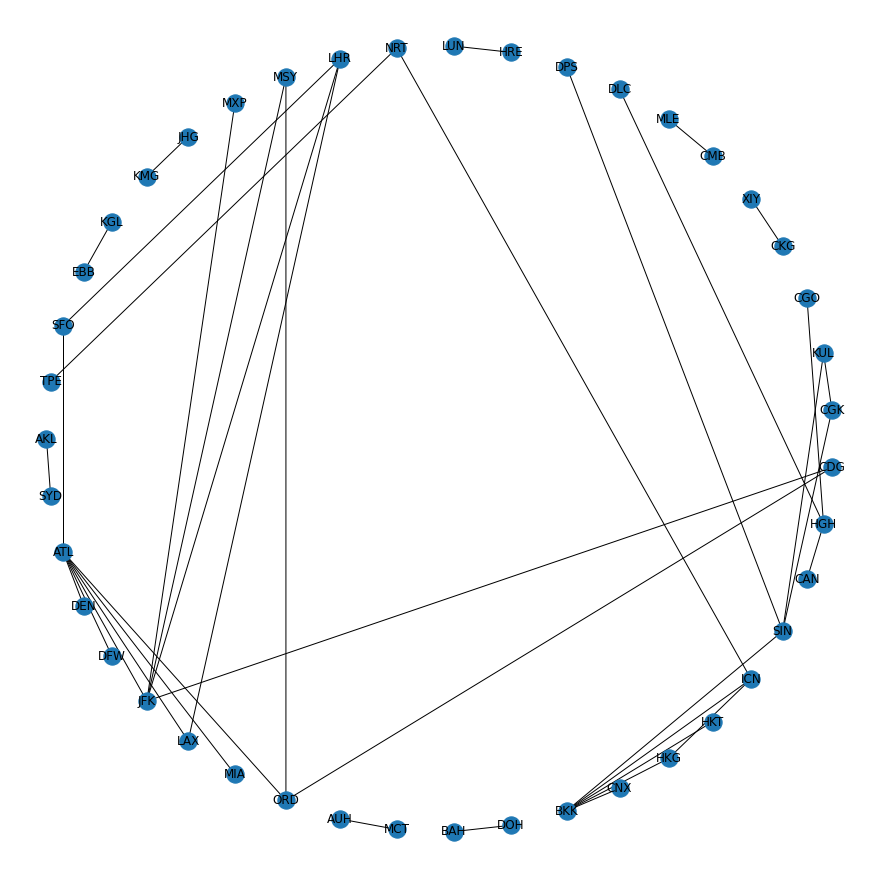

In [21]:
plt.rcParams['figure.figsize'] = 12,12

graph = nx.from_pandas_edgelist(pd.DataFrame(edges))
nx.draw_shell(graph,with_labels=True)

If we use ```nx.draw_kamada_kawai()``` we get a slightly more chaotic network visualization.

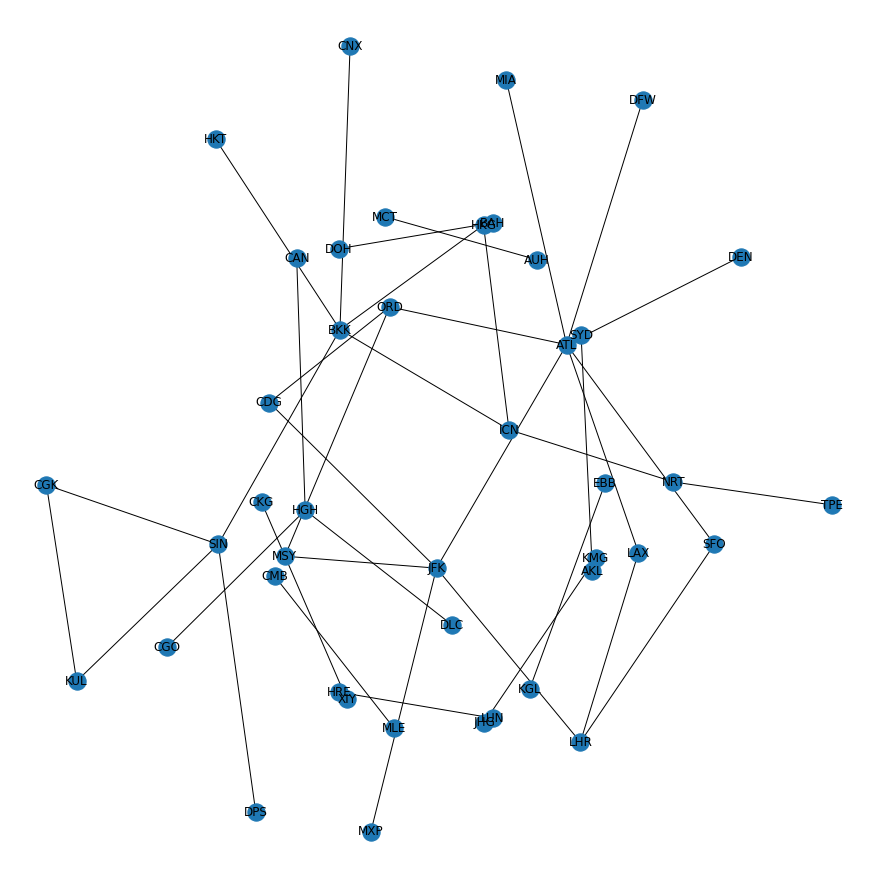

In [22]:
nx.draw_kamada_kawai(graph,with_labels=True)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

# Answer #3

## Libraries

We import the requisite libraries:

In [ ]:
import pandas as pd
from urllib.request import urlopen
from collections import Counter

## 1) Web Scraping

We read the link containing the data with pandas ```pd.read_csv()``` function.

In [23]:
link='https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv'
url=urlopen(link)
data=pd.read_csv(url)
data

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2) Data

The data contains a lot of various information about the 2019-2020 NBA season.


In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quarter,539265.0,2.545066,1.137296,1.0,2.0,3.0,4.0,6.0
SecLeft,539265.0,331.896518,207.613650,0.0,153.0,326.0,508.0,720.0
AwayScore,539265.0,56.943722,33.376788,0.0,28.0,56.0,84.0,159.0
HomeScore,539265.0,58.136317,33.806187,0.0,29.0,58.0,86.0,158.0
ShotDist,202397.0,14.049778,10.854431,0.0,3.0,14.0,25.0,88.0
Unnamed: 40,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When we examine our data, which contains various information about NBA, with ```data.info()```, we see lots of information. 

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539265 entries, 0 to 539264
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   URL                 539265 non-null  object 
 1   GameType            539265 non-null  object 
 2   Location            539265 non-null  object 
 3   Date                539265 non-null  object 
 4   Time                539265 non-null  object 
 5   WinningTeam         539265 non-null  object 
 6   Quarter             539265 non-null  int64  
 7   SecLeft             539265 non-null  int64  
 8   AwayTeam            539265 non-null  object 
 9   AwayPlay            272389 non-null  object 
 10  AwayScore           539265 non-null  int64  
 11  HomeTeam            539265 non-null  object 
 12  HomePlay            266868 non-null  object 
 13  HomeScore           539265 non-null  int64  
 14  Shooter             202397 non-null  object 
 15  ShotType            202397 non-nul

## 3) Data Processing

We take the columns we need from the big data with ```pd.DataFrame().assign()``` and create a new dataframe.

In [26]:
new_data=pd.DataFrame().assign(Assister=data['Assister'],Blocker=data['Blocker'],Rebounder=data['Rebounder'],GameType=data['GameType'])
new_data

,Assister,Blocker,Rebounder,GameType
0,NaN,NaN,NaN,regular
1,NaN,NaN,NaN,regular
2,NaN,NaN,D. Favors - favorde01,regular
3,NaN,NaN,NaN,regular
4,NaN,NaN,NaN,regular
...,...,...,...,...
539260,NaN,NaN,NaN,playoff
539261,A. Caruso - carusal01,NaN,NaN,playoff
539262,NaN,NaN,NaN,playoff
539263,NaN,NaN,NaN,playoff


In [27]:
S_D=['Assister']
df_3=new_data.groupby(S_D,as_index=False).size()
df_3

,Assister,size
0,A. Aminu - aminual01,21
1,A. Baynes - baynear01,67
2,A. Bradley - bradlav01,63
3,A. Burks - burksal01,196
4,A. Caruso - carusal01,183
...,...,...
512,Z. Collins - colliza01,16
513,Z. LaVine - lavinza01,254
514,Z. Norvell - norveza01,3
515,Z. Smith - smithzh01,2


In [28]:
Player_name=list(Counter(new_data['Assister']).keys())
Assist=list(Counter(new_data['Assister']).values())
Block=list(Counter(new_data['Blocker']).values())
Rebound=list(Counter(new_data['Rebounder']).values())
data = {'Player_name':Player_name,
        'Assist':Assist,
       'Block':Block,
       'Rebound':Rebound}
pd.DataFrame(data)

ValueError: arrays must all be same length